In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c8BSddnc0SDJ3fks4ax4MmGMFDJPWFmCZ0gn2MCm_ban',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'naturaldisastersintensityanalysis-donotdelete-pr-etzuose0dbtvao'
object_key = 'dataset.zip'

streaming_body_8 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c8BSddnc0SDJ3fks4ax4MmGMFDJPWFmCZ0gn2MCm_ban',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'naturaldisastersintensityanalysis-donotdelete-pr-etzuose0dbtvao'
object_key = 'dataset.zip'

streaming_body_7 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c8BSddnc0SDJ3fks4ax4MmGMFDJPWFmCZ0gn2MCm_ban',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'naturaldisastersintensityanalysis-donotdelete-pr-etzuose0dbtvao'
object_key = 'dataset.zip'

streaming_body_6 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [2]:
!pip install keras==2.9.0
!pip install tensorflow==2.9.0

In [3]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_6.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [4]:
import os
filenames = os.listdir('/home/wsuser/work/dataset/train_set')
print(filenames)

['Flood', 'Cyclone', 'Wildfire', 'Earthquake']


In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

2022-11-18 07:28:03.624271: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow


In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/home/wsuser/work/dataset/train_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 742 images belonging to 4 classes.


In [8]:
# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        '/home/wsuser/work/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 198 images belonging to 4 classes.


In [9]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)

2022-11-18 07:28:09.654219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 07:28:09.654335: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/30
24/24 [==============================] - 40s 2s/step - loss: 1.3095 - accuracy: 0.3612 - val_loss: 1.2541 - val_accuracy: 0.4949
Epoch 2/30
24/24 [==============================] - 37s 2s/step - loss: 1.1077 - accuracy: 0.5296 - val_loss: 1.1826 - val_accuracy: 0.4495
Epoch 3/30
24/24 [==============================] - 37s 2s/step - loss: 1.0230 - accuracy: 0.5620 - val_loss: 0.9081 - val_accuracy: 0.5960
Epoch 4/30
24/24 [==============================] - 38s 2s/step - loss: 0.8863 - accuracy: 0.6199 - val_loss: 0.8335 - val_accuracy: 0.6717
Epoch 5/30
24/24 [==============================] - 37s 2s/step - loss: 0.7708 - accuracy: 0.6914 - val_loss: 0.7540 - val_accuracy: 0.7071
Epoch 6/30
24/24 [==============================] - 37s 2s/step - loss: 0.6646 - accuracy: 0.7439 - val_loss: 0.7229 - val_accuracy: 0.7374
Epoch 7/30
24/24 [==============================] - 37s 2s/step - loss: 0.6305 - accuracy: 0.7466 - val_loss: 0.7710 - val_accuracy: 0.7172
Epoch 8/30
24/24 [==

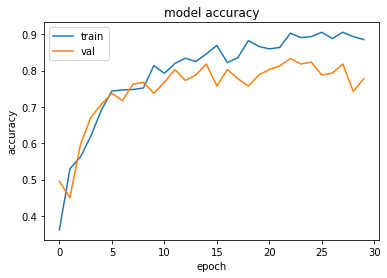

In [12]:
import matplotlib.pyplot as plt

#Traning and test accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

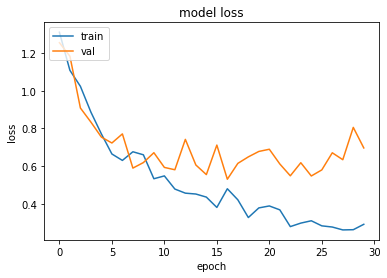

In [14]:
#model loss plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# evaluate the model
_, train_acc = cnn.evaluate(train_generator , verbose=0)
_, test_acc = cnn.evaluate(test_generator,  verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        13856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [24]:
probability_model = tf.keras.Sequential([cnn, 
                                         tf.keras.layers.Softmax()])

In [25]:
cnn.save("Disaster_Classification_model.h5")